#Analysis of Air Disasters from 1919 to 2023

The newly formed IASS (International Alliance for Safe Skies) has tasked you with conducting a thorough analysis of all aviation accidents that occurred between 1919 and 2023. To this end, they have provided a dataset containing nearly 25,000 incidents, with the following information:

* date: date of the incident

* type: aircraft type

* registration: aircraft registration code

* operator: aircraft operator

* fatalities: number of fatalities

* location: location of the incident

* country: country where the incident occurred

* cat: incident category as described by ASN

Use the data to uncover useful insights, including through charts and visualizations.

Example Insights:

* In which country did the most incidents occur?

* Do incidents happen more frequently on certain days of the week?

* Which operators are the safest?

* Which aircraft type has caused the most fatalities?

* How did incidents evolve after September 11?

Bonus:

Create a cartogram that shows the number of incidents per country.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
url = 'https://proai-datasets.s3.eu-west-3.amazonaws.com/aviation-accidents.csv'
dataset = pd.read_csv(url)
dataset.head()

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown


In [6]:
dataset.dtypes

,0
date,object
type,object
registration,object
operator,object
fatalities,object
location,object
country,object
cat,object
year,object


In [7]:
dataset.shape

(23967, 9)

###In which country did the most incidents occur?

In [8]:
dataset['country'].nunique()

232

In [9]:
incidenti_totali = dataset['country'].value_counts().head(10).reset_index()
incidenti_totali.columns = ['paesi','incidenti']
incidenti_totali['percentuale'] = (incidenti_totali['incidenti']/dataset.shape[0])*100
print(incidenti_totali)

             paesi  incidenti  percentuale
0              USA       4377    18.262611
1           Russia       1422     5.933158
2  Unknown country        838     3.496474
3             U.K.        837     3.492302
4           Canada        826     3.446405
5            India        700     2.920683
6           Brazil        609     2.540994
7           France        550     2.294822
8          Germany        516     2.152960
9            China        514     2.144616


In [10]:
incidenti_totali_abbr = incidenti_totali.copy()
incidenti_totali_abbr['paesi_abbr'] = incidenti_totali['paesi'].str[:3].str.upper()

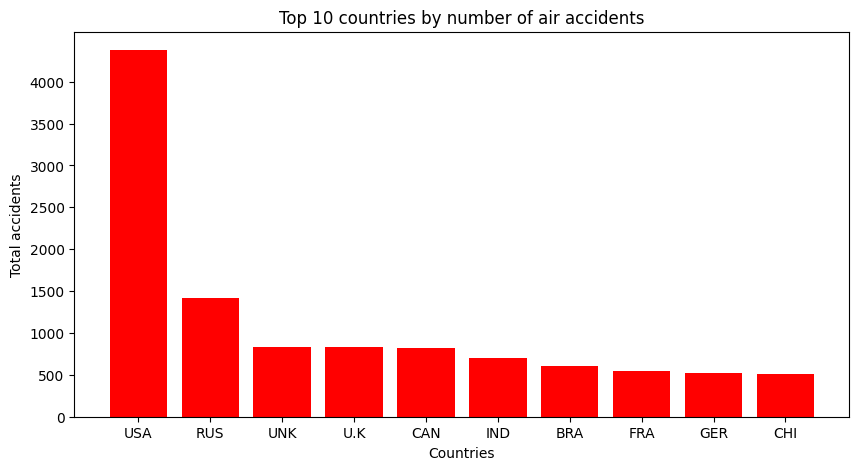

In [12]:
plt.figure(figsize=(10,5))
plt.bar(incidenti_totali_abbr['paesi_abbr'], incidenti_totali['incidenti'], color='red')
plt.xlabel("Countries")
plt.ylabel("Total accidents")
plt.title("Top 10 countries by number of air accidents")
plt.yticks(np.arange(0, 4500, 500))
plt.show()

The United States holds the record as the country with the highest number of incidents, with a total of 4,377.

###Do incidents happen more frequently on certain days of the week?

In [13]:
print(dataset['date'])

0          date unk.
1          date unk.
2          date unk.
3          date unk.
4          date unk.
            ...     
23962    11-MAY-2023
23963    11-MAY-2023
23964    12-MAY-2023
23965    14-MAY-2023
23966    15-MAY-2023
Name: date, Length: 23967, dtype: object


In [14]:
dataset['date'].isna().sum()

np.int64(0)

In [15]:
(dataset['date'] == "date unk.").sum()

np.int64(61)

In [17]:
dataset['date'] = pd.to_datetime(dataset['date'], errors='coerce')

In [18]:
print(dataset['date'].dtypes)

datetime64[ns]


In [19]:
dataset['giorni_settimana'] = dataset['date'].dt.day_name()
print(dataset['giorni_settimana'])

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
           ...   
23962    Thursday
23963    Thursday
23964      Friday
23965      Sunday
23966      Monday
Name: giorni_settimana, Length: 23967, dtype: object


In [20]:
incidenti_giorni = dataset['giorni_settimana'].value_counts()
print(incidenti_giorni)

giorni_settimana
Friday       3701
Thursday     3516
Wednesday    3491
Tuesday      3444
Monday       3317
Saturday     3186
Sunday       2753
Name: count, dtype: int64


In [21]:
ordine_giorni = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
incidenti_giorni = incidenti_giorni.reindex(ordine_giorni)
print(incidenti_giorni)

giorni_settimana
Monday       3317
Tuesday      3444
Wednesday    3491
Thursday     3516
Friday       3701
Saturday     3186
Sunday       2753
Name: count, dtype: int64


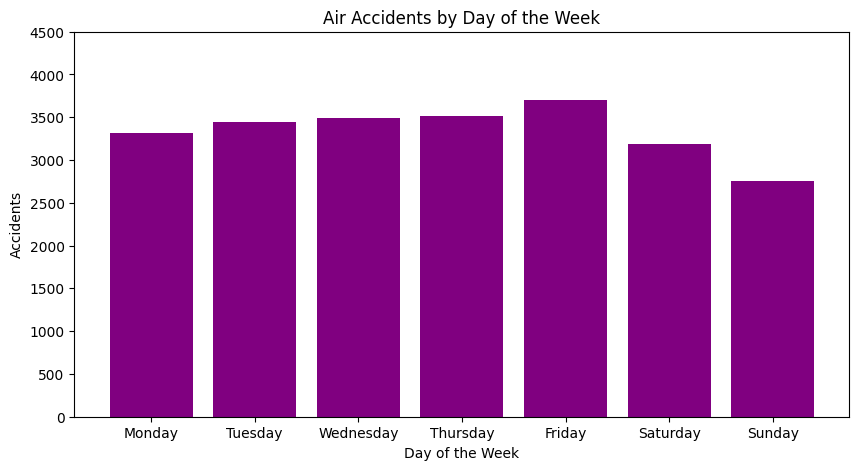

In [23]:
plt.figure(figsize=(10,5))
plt.bar(incidenti_giorni.index, incidenti_giorni.values, color='purple')
plt.xlabel("Day of the Week")
plt.ylabel("Accidents")
plt.title("Air Accidents by Day of the Week")
plt.yticks(np.arange(0,5000,500))
plt.show()

Air accidents are evenly distributed throughout the week, with a slight peak on Friday, followed by a decrease on Saturday and Sunday.

###Which operators are the safest?

In [25]:
dataset['operator'].nunique()

6017

In [26]:
dataset['operator'].isna().sum()

np.int64(4)

In [27]:
operatori_1_incidente = dataset['operator'].value_counts()
operatori_1_incidente = operatori_1_incidente[operatori_1_incidente == 1].index
print(operatori_1_incidente)

Index(['Belavia', 'Naturelink Airlines', 'EAS Airlines',
       'Interstate Helicopters', 'Tadair', 'SASCA Airlines',
       'US Airways Express, opb Republic Airlines', 'Volga-Aviaexpress',
       'Krasnoyarski ASK', 'American Virginia',
       ...
       'Viking Air Transport', 'Rhoades Int.', 'Bruno's',
       'Business Express, op.for Delta Connection', 'Norfolk Island Airlines',
       'ANA, opf USAAF', 'Aerovias Brasil, lsf TACA', 'Air Carrier Transport',
       'BOAC, op.for Qantas', 'Aliserio'],
      dtype='object', name='operator', length=4063)


In [28]:
operatori_1_incidente.nunique()

4063

In [29]:
dataset['fatalities'] = pd.to_numeric(dataset['fatalities'], errors='coerce')

In [30]:
operatori_sicuri = dataset[(dataset['operator'].isin(operatori_1_incidente)) & (dataset['fatalities']==0)]['operator'].unique()
print(len(operatori_sicuri))

2416


In [31]:
print(operatori_sicuri)

['MD Air Services' 'JetPet' 'HP Indo-Burmese Transport' ...
 'Angkasa Super Services' 'Nasional Global Aviasi' 'Bar Aviation']


There are a total of 6,017 operators, of which 4,063 have caused only one incident. Among these 4,063, 2,416 have caused no fatalities. Among these safer operators are, for example, "MD Air Services," "JetPet," "HP Indo-Burmese Transport," "Angkasa Super Services," "Nasional Global Aviasi," and "Bar Aviation."

###Which aircraft type has caused the most fatalities?

In [32]:
dataset['type'].nunique()

3201

In [33]:
dataset['type'].isna().sum()

np.int64(0)

In [34]:
velivolo_mortale = dataset.groupby('type')['fatalities'].sum().sort_values(ascending=False).head(1)
print(velivolo_mortale)

type
Douglas C-47A (DC-3)    5689.0
Name: fatalities, dtype: float64


The Douglas C-47A (DC-3) aircraft, with 5,689 fatalities, is the deadliest aircraft.

###Where do incidents mainly occur?

In [35]:
dataset['location'].nunique()

14608

In [36]:
location_incidenti = dataset['location'].value_counts()
location_incidenti.head(20)

,count
location,
unknown,272
Havana-JosÃ© Mar...,106
Miami Internatio...,71
Beirut Internati...,48
New York-John F....,44
Amsterdam-Schiph...,44
Unknown,44
Chicago-O'Hare I...,40
BogotÃ¡-Eldorado...,31


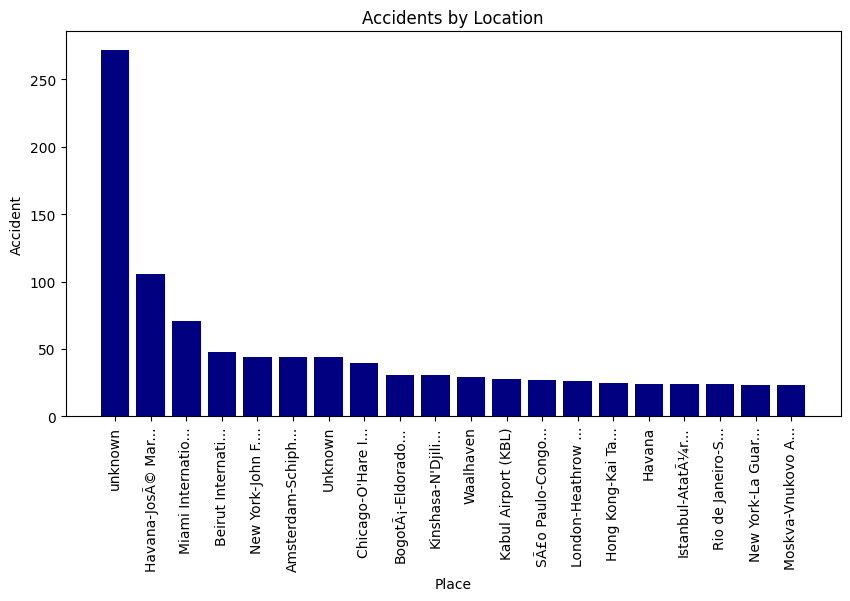

In [37]:
plt.figure(figsize=(10,5))
plt.bar(location_incidenti.index[:20], location_incidenti.values[:20], color='navy')
plt.xlabel("Place")
plt.ylabel("Accident")
plt.title("Accidents by Location")
plt.xticks(rotation=90)
plt.show()

Most accidents occurred near airports. However, there is a large percentage with unknown locations.

###How have accidents evolved since September 11?

In [39]:
dataset['anno'] = dataset['date'].dt.year

In [40]:
incidenti_prima_11_settembre = dataset[dataset['date'] < '2001-09-11']
incidenti_dopo_11_settembre = dataset[dataset['date'] >= '2001-09-11']
print(incidenti_prima_11_settembre.shape[0])
print(incidenti_dopo_11_settembre.shape[0])

18898
4510


In [41]:
incidenti_prima = incidenti_prima_11_settembre.groupby('anno').size()
incidenti_dopo = incidenti_dopo_11_settembre.groupby('anno').size()

In [42]:
morti_prima_11_settembre = incidenti_prima_11_settembre['fatalities'].sum()
morti_dopo_11_settembre = incidenti_dopo_11_settembre['fatalities'].sum()
print(morti_prima_11_settembre)
print(morti_dopo_11_settembre)

105380.0
15309.0


In [43]:
morti_prima = incidenti_prima_11_settembre.groupby('anno')['fatalities'].sum()
morti_dopo = incidenti_dopo_11_settembre.groupby('anno')['fatalities'].sum()

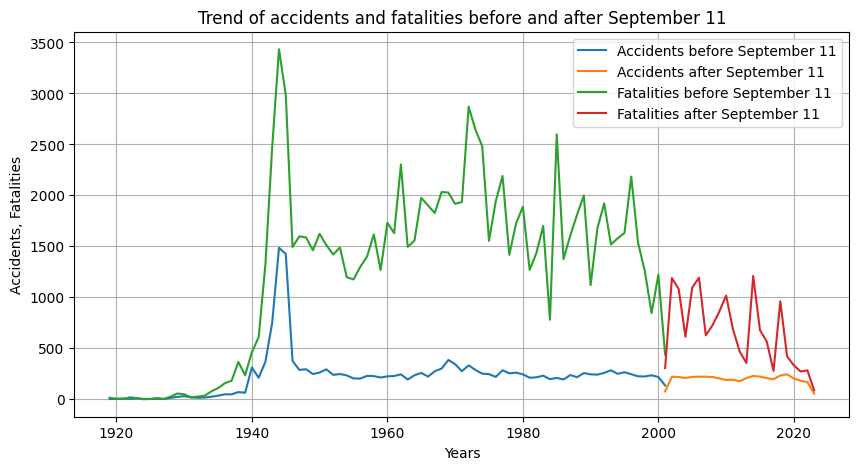

In [44]:
plt.figure(figsize=(10,5))
plt.plot(incidenti_prima.index, incidenti_prima.values, label="Accidents before September 11")
plt.plot(incidenti_dopo.index, incidenti_dopo.values, label="Accidents after September 11")
plt.plot(morti_prima.index, morti_prima.values, label="Fatalities before September 11")
plt.plot(morti_dopo.index, morti_dopo.values, label="Fatalities after September 11")
plt.xlabel("Years")
plt.ylabel("Accidents, Fatalities")
plt.title("Trend of accidents and fatalities before and after September 11")
plt.legend()
plt.grid(True)
plt.show()

Considering the two decades before and after September 11, 2001, a clearer difference can be observed.

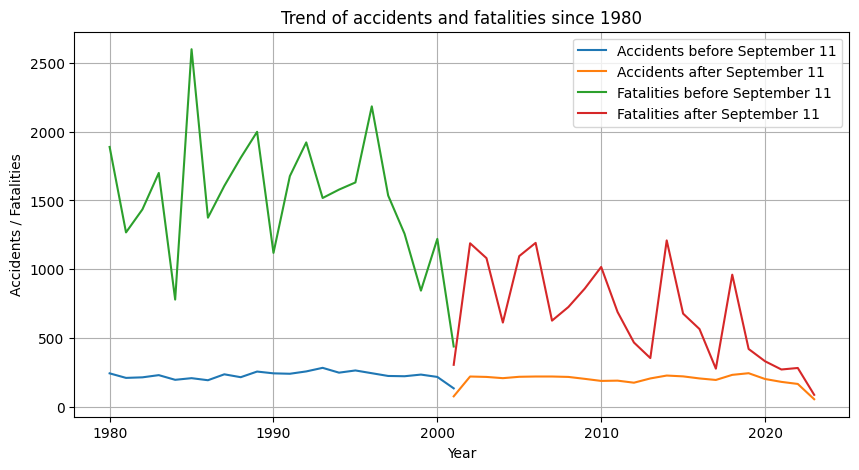

In [46]:
plt.figure(figsize=(10,5))
plt.plot(incidenti_prima[incidenti_prima.index >= 1980], label="Accidents before September 11")
plt.plot(incidenti_dopo[incidenti_dopo.index >= 1980], label="Accidents after September 11")
plt.plot(morti_prima[morti_prima.index >= 1980], label="Fatalities before September 11")
plt.plot(morti_dopo[morti_dopo.index >= 1980], label="Fatalities after September 11")
plt.xlabel("Year")
plt.ylabel("Accidents / Fatalities")
plt.title("Trend of accidents and fatalities since 1980")
plt.legend()
plt.grid(True)
plt.show()

The September 11 attacks led to an increase in security measures during flights, as can be seen in the graph. The first two decades of the 2000s were marked by fluctuations that eventually resulted in a gradual reduction in the number of fatalities. The number of accidents also slowly decreased, especially starting from 2020.

###Relationship between countries and annual accidents

In [47]:
incidenti_per_anno = dataset['year'].value_counts().reset_index()
incidenti_per_anno.columns = ['Anno', 'Incidenti']
print(incidenti_per_anno.head(30))

    Anno  Incidenti
0   1944       1505
1   1945       1445
2   1943        769
3   1969        393
4   1942        389
5   1946        379
6   1970        351
7   1972        339
8   1940        318
9   1968        307
10  1948        300
11  1951        295
12  1973        293
13  1947        292
14  1977        291
15  1993        288
16  1971        284
17  1967        280
18  1989        268
19  1995        267
20  1979        267
21  1975        266
22  1992        264
23  1965        262
24  1950        262
25  1978        259
26  1994        258
27  1974        254
28  1980        254
29  1996        253


In [48]:
incidenti_anno_paese = dataset.groupby(['country', 'year']).size().reset_index()
incidenti_anno_paese.columns = ['Paese', 'Anno', 'Incidenti']
primi_20 = incidenti_anno_paese.sort_values(by='Incidenti', ascending=False).head(30)
print(primi_20)

                Paese  Anno  Incidenti
6009  Unknown country  1945        276
5842              USA  1944        180
3810      Netherlands  1940        178
5841              USA  1943        171
1122            China  1945        163
3707          Myanmar  1945        149
2493            India  1944        144
5843              USA  1945        125
5723             U.K.  1944        123
6008  Unknown country  1944        123
1121            China  1944        109
2494            India  1945        109
2047          Germany  1945        104
3706          Myanmar  1944        100
1892           France  1944         91
3812      Netherlands  1944         90
5840              USA  1942         76
4388      Philippines  1945         73
6007  Unknown country  1943         70
5917              USA  2019         69
5844              USA  1946         69
5845              USA  1947         68
5849              USA  1951         67
5876              USA  1978         62
4084      P.N. Guinea  19

Most accidents occurred in the 1940s; 1944 and 1945 together account for nearly 3,000 accidents.
The United States is the country where the most accidents took place during those years and still holds this record today (e.g., 2019, 2020, 2021).
Unfortunately, for many accidents that occurred in the early 1940s, the location is unknown.

###Accidents by countries

In [49]:
pip install geopandas

In [50]:
import geopandas as gpd

In [51]:
incidenti_per_nazione = dataset['country'].value_counts().reset_index()
incidenti_per_nazione.columns = ['Paese', 'Incidenti']
incidenti_per_nazione

,Paese,Incidenti
0,USA,4377
1,Russia,1422
2,Unknown country,838
3,U.K.,837
4,Canada,826
...,...,...
227,Cook Isl.,1
228,Kosovo,1
229,Burundi,1
230,Eswatini,1


In [52]:
from zipfile import ZipFile
from google.colab import files
uploaded = files.upload()

Saving ne_110m_admin_0_countries.cpg to ne_110m_admin_0_countries.cpg
Saving ne_110m_admin_0_countries.dbf to ne_110m_admin_0_countries.dbf
Saving ne_110m_admin_0_countries.prj to ne_110m_admin_0_countries.prj
Saving ne_110m_admin_0_countries.README.html to ne_110m_admin_0_countries.README.html
Saving ne_110m_admin_0_countries.shp to ne_110m_admin_0_countries.shp
Saving ne_110m_admin_0_countries.shx to ne_110m_admin_0_countries.shx
Saving ne_110m_admin_0_countries.VERSION.txt to ne_110m_admin_0_countries.VERSION.txt


In [53]:
world_map = gpd.read_file("ne_110m_admin_0_countries.shp")
world_map

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895..."


In [54]:
paesi_mappa = set(world_map['ADMIN'])
paesi_incidenti = set(incidenti_per_nazione['Paese'])

differenza_mappa = paesi_incidenti - paesi_mappa
print(differenza_mappa)

{'Indian Ocean', 'Bosnia', 'Samoa', 'CuraÃ§ao', 'Saint Lucia', 'Kiribati', 'Arctic Ocean', 'Micronesia', 'Christmas Isl.', 'C.A.R.', 'French Guiana', 'U.A.E.', 'Reunion', 'Comoros', 'Cook Isl.', 'U.K.', 'Malta', 'D.R. Congo', 'Saint BarthÃ©lemy', 'U.S. Virgin Isl.', 'Czech Rep.', 'Aruba', 'Dominican Rep.', 'Palau', 'Anguilla', 'USA', 'Tanzania', 'Maldives', 'Solomon Isl.', "Cote d'Ivoire", 'Tuvalu', 'B.V.I.', 'Turks & Caicos', 'St. Vincent', 'French Polynesia', 'Northern Mariana Isl', 'Guadeloupe', 'Gibraltar', 'Cape Verde', 'Singapore', 'Trinidad & Tobago', 'U.S. M.O. Islands', 'Macau', 'Antigua', 'P.N. Guinea', 'Timor', 'Falkland Isl.', 'Mauritius', 'Seychelles', 'Unknown country', 'St.Pierre & Miquelon', 'Tonga', 'American Samoa', 'Atlantic Ocean', 'Bahrain', 'Barbados', 'St. Helena', 'Cayman Isl.', 'Bermuda', 'Eswatini', 'Sint Maarten', 'Pacific Ocean', 'Eq. Guinea', 'Serbia', 'Hong Kong', 'Monaco', 'Bahamas', 'Dominica', 'Montserrat', 'Guam', 'Sao Tome', "Caribbean Neth'lands", '?

In [55]:
differenza_incidenti = paesi_mappa - paesi_incidenti
print(differenza_incidenti)

{'United Republic of Tanzania', 'Equatorial Guinea', 'United Kingdom', 'Papua New Guinea', 'Central African Republic', 'Republic of Serbia', 'Solomon Islands', 'United States of America', 'Trinidad and Tobago', 'Northern Cyprus', 'The Bahamas', 'eSwatini', 'Ivory Coast', 'East Timor', 'Democratic Republic of the Congo', 'Falkland Islands', 'French Southern and Antarctic Lands', 'Bosnia and Herzegovina', 'Dominican Republic', 'Republic of the Congo', 'Czechia', 'Brunei', 'Somaliland', 'Palestine', 'United Arab Emirates'}


In [56]:
rename_countries = {
    'P.N. Guinea' : 'Papua New Guinea',
    'Eq. Guinea' : 'Equatorial Guinea',
    'D.R. Congo' : 'Democratic Republic of the Congo',
    'Solomon Isl.' : 'Solomon Islands',
    'U.S. M.O. Islands' : 'United States of America',
    'Congo' : 'Republic of the Congo',
    'Eswatini' : 'eSwatini',
    'Bosnia' : 'Bosnia and Herzegovina',
    "Cote d'Ivoire" : "Ivory Coast",
    'U.S. Virgi Isl.' : 'United States of America',
    'USA' : 'United States of America',
    'Tanzania' : 'United Republic of Tanzania',
    'Bahamas' : 'The Bahamas',
    'U.A.E.' : 'United Arab Emirates',
    'Serbia' : 'Republic of Serbia',
    'U.K.' : 'United Kingdom',
    'Czech Rep.' : 'Czechia',
    'Dominica' : 'Dominican Republic',
    'Dominican Rep.' : 'Dominican Republic',
    'Timor' : 'East Timor',
}

incidenti_per_nazione['Paese'] = incidenti_per_nazione['Paese'].replace(rename_countries)
incidenti_per_nazione = incidenti_per_nazione.groupby('Paese', as_index=False).sum()

In [57]:
paesi_mappa = set(world_map['ADMIN'])
paesi_incidenti = set(incidenti_per_nazione['Paese'])

differenza_mappa = paesi_incidenti - paesi_mappa
print(differenza_mappa)

{'Aruba', 'Indian Ocean', 'Antigua', 'Hong Kong', 'Samoa', 'Monaco', 'CuraÃ§ao', 'Saint Lucia', 'Falkland Isl.', 'Mauritius', 'Kiribati', 'Palau', 'Arctic Ocean', 'Seychelles', 'Anguilla', 'Unknown country', 'Montserrat', 'Guam', 'St.Pierre & Miquelon', 'Micronesia', 'Christmas Isl.', 'Maldives', 'Tonga', 'Sao Tome', 'American Samoa', "Caribbean Neth'lands", 'Atlantic Ocean', '?', 'C.A.R.', 'Bahrain', 'Barbados', 'Norfolk Island', 'French Guiana', 'Reunion', 'St. Helena', 'Tuvalu', 'B.V.I.', 'Turks & Caicos', 'St. Vincent', 'Cayman Isl.', 'French Polynesia', 'Martinique', 'Comoros', 'Bermuda', 'Northern Mariana Isl', 'Cook Isl.', 'Marshall Isl.', 'Malta', 'Mediterranean Sea', 'Saint BarthÃ©lemy', 'Cocos Isl.', 'Guadeloupe', 'Gibraltar', 'Cape Verde', 'Singapore', 'Trinidad & Tobago', 'Sint Maarten', 'U.S. Virgin Isl.', 'Pacific Ocean', 'Macau', 'St. Kitts & Nevis'}


In [58]:
differenza_incidenti = paesi_mappa - paesi_incidenti
print(differenza_incidenti)

{'Somaliland', 'Palestine', 'Falkland Islands', 'Trinidad and Tobago', 'French Southern and Antarctic Lands', 'Northern Cyprus', 'Central African Republic', 'Brunei'}


In [59]:
mappa_incidenti = world_map.merge(incidenti_per_nazione, left_on='ADMIN', right_on='Paese')
mappa_incidenti

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry,Paese,Incidenti
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ...",Fiji,19
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3...",United Republic of Tanzania,52
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",Western Sahara,6
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025...",Canada,826
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312...",United States of America,4389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Admin-0 country,1,6,North Macedonia,MKD,0,2,Sovereign country,1,North Macedonia,...,None,None,None,None,None,None,None,"POLYGON ((22.38053 42.32026, 22.88137 41.9993,...",North Macedonia,10
165,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Republic of Serbia,25
166,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,...",Montenegro,5
167,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",Kosovo,1


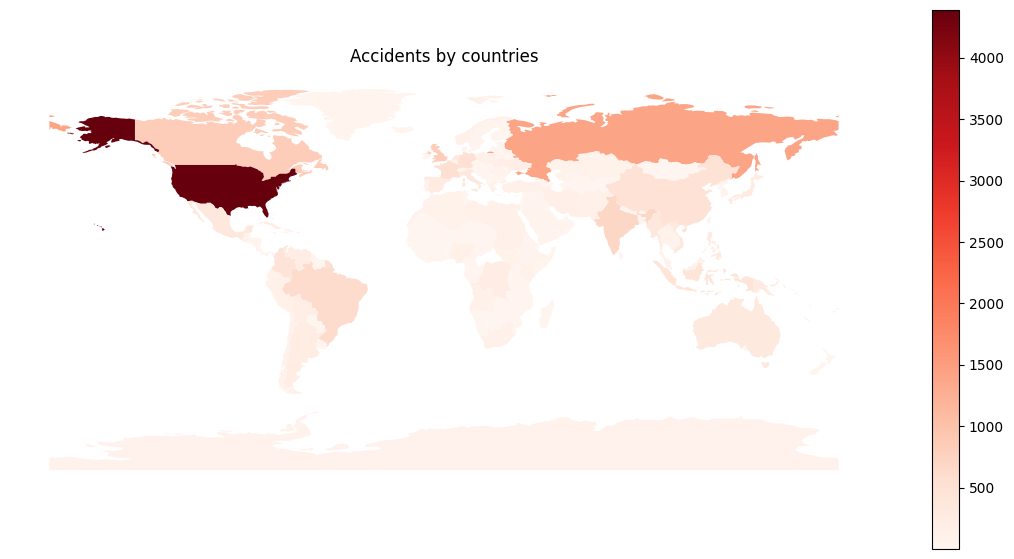

In [60]:
fig, ax = plt.subplots(figsize=(14,7))
mappa_incidenti.plot(column='Incidenti', cmap='Reds', legend=True, ax=ax)
plt.title('Accidents by countries')
plt.axis('off')
plt.show()